In [58]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [114]:
ticker = "AAPL"
window = 20

df = yf.download(ticker, start='2024-01-01', auto_adjust=True, interval='1h')
df.sort_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [60]:
df['MA'] = df['Close', ticker].rolling(window).mean()

Text(0.5, 1.0, 'SPY Close vs. Moving Average')

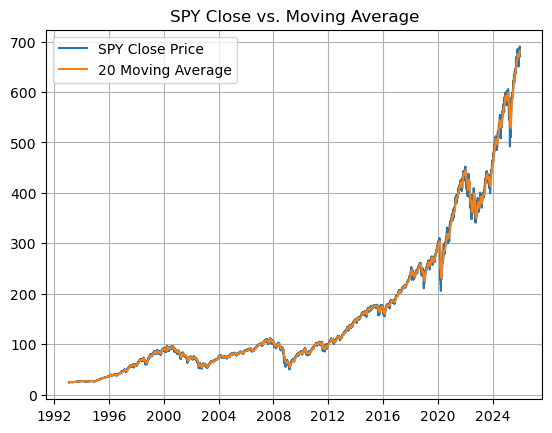

In [61]:
plt.plot(df['Close'])
plt.plot(df['MA'])
plt.grid(True)
plt.legend([f'{ticker} Close Price', f'{window} Moving Average'])
plt.title(f'{ticker} Close vs. Moving Average')


In [62]:
df = df.dropna().copy()
df.columns = df.columns.get_level_values(0)

This code is a "Flattening" operation. It simplifies your DataFrame by deleting the bottom row of headers and keeping only the top row.

In [63]:
#df['strategy'] = (df['Close'] > df['MA']).astype(int)
df.head()

Price,Close,High,Low,Open,Volume,MA
Date,,,,,,
1993-02-26,24.500036,24.517278,24.379346,24.517278,66200,24.426752
1993-03-01,24.431057,24.586230,24.396574,24.586230,66500,24.436235
1993-03-02,24.793135,24.793135,24.413824,24.448307,182400,24.455200
1993-03-03,24.896587,24.913829,24.793139,24.827622,280100,24.476753
1993-03-04,24.758635,24.931048,24.758635,24.931048,89500,24.478476


In [88]:
def add_ma_strategy(df):

    df['strategy'] = np.where(df['Close'] > df['MA'], 1, -1)

    return df

df = add_ma_strategy(df)
df['asset_cumulative'] = np.cumprod(1 + df["Close"].pct_change()) -1
df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['strategy'].shift()) -1

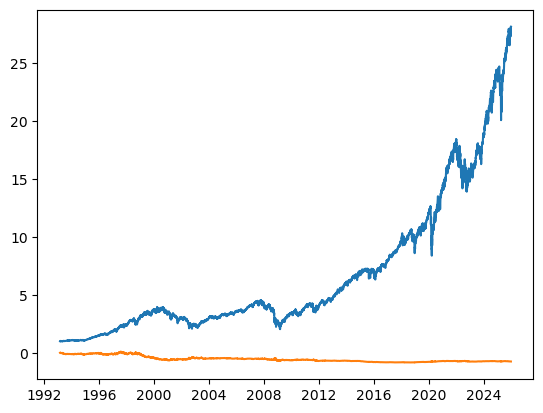

In [87]:
plt.plot(df["asset_cumulative"])
plt.plot(df["strategy_cumulative"])

If Strategy > Asset: Congratulations! Your code is smarter than the market. You generated "Alpha."

If Asset > Strategy: Bad news. You did a lot of work (and paid trading fees) just to lose money compared to doing nothing. You would have been better off just buying the stock and holding it

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,MA,strategy,asset_cumulative,strategy_cumulative
Date,,,,,,,,,
2019-12-05,31.309999,33.650002,30.510000,33.650002,6496100,25.5907,NaN,NaN,NaN
2019-12-06,32.630001,33.389999,31.360001,31.799999,6812300,25.7281,1.0,0.042159,0.042159
2019-12-09,34.770000,35.349998,33.040001,33.310001,7761400,25.9187,1.0,0.110508,0.110508
2019-12-10,32.779999,35.099998,31.620001,35.040001,13158400,26.0723,1.0,0.046950,0.046950
2019-12-11,32.029999,32.380001,29.870001,32.119999,7289000,26.2627,1.0,0.022996,0.022996


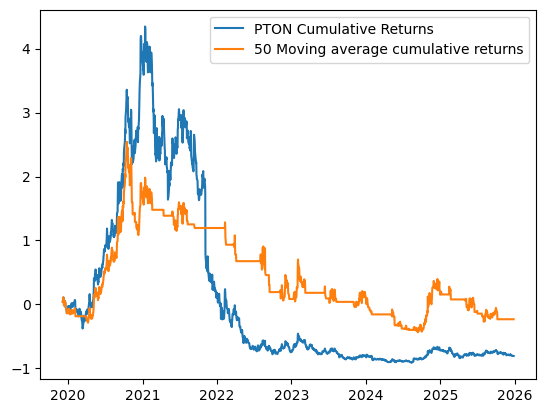

In [ ]:
ticker = "PTON"
window = 50

def get_data():
    df = yf.download(ticker, start='1993-01-01', auto_adjust=True, interval='1d')
    df.sort_index(inplace=True)

    df['MA'] = df['Close', ticker].rolling(window).mean()
    return df.dropna().copy()

def add_strategy(df):
    df.columns = df.columns.get_level_values(0)
    df['strategy'] = np.where(df['Close'] > df['MA'], 1, -1)
    df['strategy'] = df['strategy'].shift(1) #shift to avoid lookahead bias
    return df

def test_strategy(df):
    df['asset_cumulative'] = (1 + df["Close"].pct_change()).cumprod() -1 #benchmark
    df['strategy_cumulative'] = (1 + df['Close'].pct_change() * df['strategy']).cumprod() -1 

    #plot the returns
    plt.plot(df["asset_cumulative"])
    plt.plot(df["strategy_cumulative"])
    plt.legend([f'{ticker} Cumulative Returns', f'{window} Moving average cumulative returns']) 
    return df

def main():
    df = get_data()
    df = add_strategy(df)
    df = test_strategy(df)
    return df.head()

main()